## Regularization (Ridge , Lasso, ElasticNet)

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Creating Dataset from sklearn

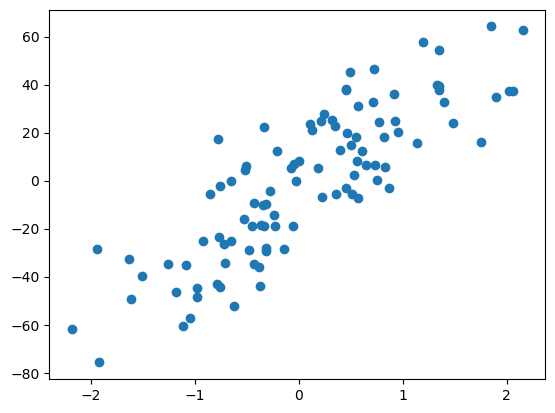

In [4]:
X , y = datasets.make_regression(n_samples=100, n_features=1, noise=20, n_targets=1, random_state=13)
plt.scatter(X, y)

### Apply Linear Regression

In [6]:
lr = LinearRegression()
lr.fit(X, y)
print("B1: ", lr.coef_)
print("B0: ", lr.intercept_)

B1:  [27.82809103]
B0:  -2.29474455867698


### Ridge Regression alpha=0

In [20]:
rr = Ridge(alpha=0)
rr.fit(X,y)
print("B1: ", rr.coef_)
print("B0: ", rr.intercept_)  #same coefficents as Regularization term is zero

B1:  [27.82809103]
B0:  -2.29474455867698


#### Ridge with alpa = 10

In [11]:
rr1 = Ridge(alpha=10)
rr1.fit(X,y)
print("B1: ", rr1.coef_)
print("B0: ", rr1.intercept_) 

B1:  [24.9546267]
B0:  -2.1269130035235726


#### Ridge with alpa = 100

In [12]:
rr2 = Ridge(alpha=100)
rr2.fit(X,y)
print("B1: ", rr2.coef_)
print("B0: ", rr2.intercept_) 

B1:  [12.93442104]
B0:  -1.4248441496033308


### Lasso Regression alpha  = 0

In [13]:
lasr = Lasso(alpha=0)
lasr.fit(X, y)
print("B1: ", lasr.coef_)
print("B0: ", lasr.intercept_) 

B1:  [27.82809103]
B0:  -2.2947445586769795


C:\Users\ASCC\AppData\Local\Temp\ipykernel_12676\412167606.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasr.fit(X, y)
C:\Users\ASCC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASCC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+04, tolerance: 9.560e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


#### Lasso Regression alpha  = 10

In [14]:
lasr1 = Lasso(alpha=10)
lasr1.fit(X, y)
print("B1: ", lasr1.coef_)
print("B0: ", lasr1.intercept_)  # More Than Ridge

B1:  [16.31333521]
B0:  -1.6221977112974222


#### Lasso Regression alpha  = 100

In [16]:
lasr2 = Lasso(alpha=100)
lasr2.fit(X, y)
print("B1: ", lasr2.coef_)
print("B0: ", lasr2.intercept_) # Not Good

B1:  [0.]
B0:  -0.669378360869679


## Plot of Lines

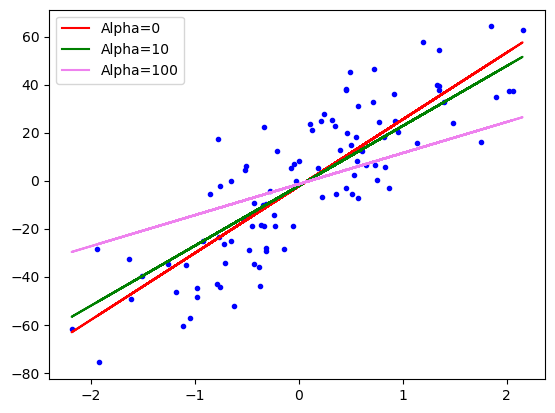

In [21]:
plt.plot(X, y, 'b.')
plt.plot(X, rr.predict(X), color='red', label='Alpha=0')
plt.plot(X, rr1.predict(X), color='green', label='Alpha=10')
plt.plot(X, rr2.predict(X), color='violet', label='Alpha=100')
plt.legend()

## Ridge Regression Prevent Overfitting

In [23]:
df = pd.read_csv("datasets/Melbourne_housing.csv")
df.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Regionname,Propertycount,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,S,Biggin,2.5,Northern Metropolitan,4019.0,Yarra City Council,2.0,1.0,1.0,202.0,160.2564,1480000.0
1,Abbotsford,2,h,S,Biggin,2.5,Northern Metropolitan,4019.0,Yarra City Council,2.0,1.0,0.0,156.0,79.0000,1035000.0
2,Abbotsford,3,h,SP,Biggin,2.5,Northern Metropolitan,4019.0,Yarra City Council,3.0,2.0,0.0,134.0,150.0000,1465000.0
3,Abbotsford,3,h,PI,Biggin,2.5,Northern Metropolitan,4019.0,Yarra City Council,3.0,2.0,1.0,94.0,160.2564,850000.0
4,Abbotsford,4,h,VB,Nelson,2.5,Northern Metropolitan,4019.0,Yarra City Council,3.0,1.0,2.0,120.0,142.0000,1600000.0


### Handles Categorical Features

In [25]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Rooms,Distance,Propertycount,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,2,2.5,4019.0,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2.5,4019.0,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,2.5,4019.0,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,2.5,4019.0,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,2.5,4019.0,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
X = df.drop("Price", axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=2)

In [32]:
lr.fit(X_train, y_train)
print("Training Error:", r2_score(y_train, lr.predict(X_train)))
print("Training Error:", lr.score(X_train,y_train))

Training Error: 0.6792421760392957
Training Error: 0.6792421760392957


In [33]:
print("Testing Error:", r2_score(y_test, lr.predict(X_test)))
print("Testing Error:", lr.score(X_test, y_test))

Testing Error: 0.6748321429524
Testing Error: 0.6748321429524


In [31]:
rr3 = Ridge(alpha=1)
rr3.fit(X_train, y_train)

Ridge(alpha=1)

In [34]:
print("Training Error:", r2_score(y_train, rr3.predict(X_train)))
print("Training Error:", rr3.score(X_train,y_train))
print("Testing Error:", r2_score(y_test, rr3.predict(X_test)))
print("Testing Error:", rr3.score(X_test, y_test))

Training Error: 0.6786205172209274
Training Error: 0.6786205172209274
Testing Error: 0.6778908905824348
Testing Error: 0.6778908905824348
